<a href="https://colab.research.google.com/github/kemontz/Machine-Learning/blob/main/tugas_Latiha_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

# Importing the dataset
# Replace with the actual path to your file
dataset = pd.read_csv('pengangguran.csv')
dataset.head()

,Periode,Bulan,Tidak/belum pernah sekolah,Tidak/belum tamat SD,SD,SLTP,SLTA Umum/SMU,SLTA Kejuruan/SMK,Akademi/Diploma,Universitas,Total
0,2006,Februari,234465,614960,2675459,2860007,2842876,1204140,297185,375601,11104693
1,2006,Agustus,170666,611254,2589699,2730045,2851518,1305190,278074,395554,10932000
2,2007,Februari,145750,520316,2753548,2643062,2630360,1114675,330316,409890,10547917
3,2007,Agustus,94301,438519,2179792,2264198,2532204,1538349,397191,566588,10011142
4,2008,Februari,79764,448431,2216748,2166619,2204377,1165582,519867,626202,9427590


In [2]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming 'dataset' is your pandas DataFrame

# 1. Identify categorical features and apply OneHotEncoding
categorical_features = ['Bulan']  # Changed 'nama_bulan' to 'Bulan'
numerical_features = [col for col in dataset.columns if col not in categorical_features and col != dataset.columns[-1]]

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for numpy arrays

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(dataset[categorical_features])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the numerical features
preprocessed_data = pd.concat([dataset[numerical_features], encoded_df, dataset[dataset.columns[-1]]], axis=1)

# 2. Split data and apply StandardScaler to numerical features only
x = preprocessed_data.iloc[:, :-1].values
y = preprocessed_data.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Apply StandardScaler to numerical features only
# Assuming your numerical features are in the first few columns of x_train and x_test
# Adjust the column indices according to your data
num_features_indices = np.arange(len(numerical_features))
sc = StandardScaler()
x_train[:, num_features_indices] = sc.fit_transform(x_train[:, num_features_indices])
x_test[:, num_features_indices] = sc.transform(x_test[:, num_features_indices])

In [8]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(C=2)
model_logistic.fit(x_train,y_train)

y_pred_logistic = model_logistic.predict(x_test)

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=50)
dt.fit(x_train,y_train)

y_pred_tree = dt.predict_proba(x_test)

In [10]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=100)
rfr.fit(x_train,y_train)

y_pred_forest = rfr.predict_proba(x_test)

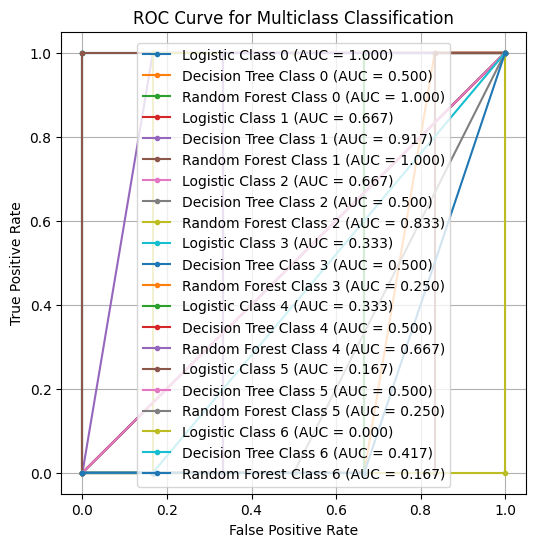

In [11]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarisasi y_test menjadi one-hot encoding
n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  # Mengubah ke one-hot encoding

# Prediksi probabilitas untuk semua kelas
y_pred_logistic = model_logistic.predict_proba(x_test)
y_pred_tree = dt.predict_proba(x_test)
y_pred_forest = rfr.predict_proba(x_test)

# Inisialisasi plot ROC
plt.figure(figsize=(6,6), dpi=100)

# Loop untuk setiap kelas
for i in range(n_classes):
    logistic_fpr, logistic_tpr, _ = roc_curve(y_test_bin[:, i], y_pred_logistic[:, i])
    auc_logistic = auc(logistic_fpr, logistic_tpr)

    dt_fpr, dt_tpr, _ = roc_curve(y_test_bin[:, i], y_pred_tree[:, i])
    auc_dt = auc(dt_fpr, dt_tpr)

    rfr_fpr, rfr_tpr, _ = roc_curve(y_test_bin[:, i], y_pred_forest[:, i])
    auc_rfr = auc(rfr_fpr, rfr_tpr)

    plt.plot(logistic_fpr, logistic_tpr, marker=".", label=f'Logistic Class {i} (AUC = {auc_logistic:.3f})')
    plt.plot(dt_fpr, dt_tpr, marker=".", label=f'Decision Tree Class {i} (AUC = {auc_dt:.3f})')
    plt.plot(rfr_fpr, rfr_tpr, marker=".", label=f'Random Forest Class {i} (AUC = {auc_rfr:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend()
plt.grid()
plt.show()
